In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados


In [2]:
df = pd.read_csv('../data/comprovantes_pix_10000_anomalias.csv', sep=';')
df.head()

,EndToEndId,DataHora,Valor,Moeda,Pagador_Nome,Pagador_CPF_CNPJ,Pagador_Banco,Recebedor_Nome,Recebedor_CPF_CNPJ,Recebedor_Banco,ChavePix_Utilizada,TipoChave,Descricao,Status,Anomalia
0,f094cb2c-2a73-463c-b60e-0c57262051e4,2025-06-26 21:07:56,4658.86,BRL,Nathan Cardoso,13.253.967/0001-95,BTG Pactual,Ana Beatriz Ramos,901.361.580-95,Nubank,+559694830-9884,Telefone,Pagamento referente ao serviço 927,Concluída,0
1,f0409769-741f-49bd-811a-3842cc8f54db,2025-06-23 17:47:56,3184.72,BRL,Benjamin Barros,781.515.544-64,Banco do Brasil,Carlos Eduardo Nunes,288.758.607-72,Itaú Unibanco,+552298530-1917,Telefone,Pagamento referente ao serviço 950,Pendente,0
2,c1d22287-d343-4c91-b03d-dbe9a69695b3,2025-06-27 15:58:56,1054.48,BRL,Lorena Cunha,444.922.709-96,Banco Inter,Lívia Silveira,530.827.935-48,Bradesco,c4f4c3c6-4d78-4946-b33e-4a1135711a8a,Chave Aleatória,Pagamento referente ao serviço 173,Pendente,0
3,254423a9-50b7-41b1-a099-e8cf6232bab4,2025-07-15 13:59:56,3564.76,BRL,Sra. Luana Pinto,468.153.904-62,Banco Safra,Helena Pires,827.707.674-51,Caixa Econômica Federal,user421@email.com,E-mail,Pagamento referente ao serviço 560,Estornada,0
4,f1c5e3e7-bc62-4f18-91e3-c8f92aebdd59,2025-06-23 06:19:56,15.16,BRL,João Miguel da Cunha,83.407.726/0001-68,Santander Brasil,Dr. Luiz Felipe Dias,65.245.322/0001-12,C6 Bank,user97@email.com,E-mail,Pagamento referente ao serviço 140,Pendente,0


### Análise exploratória dos dados
Primeiramente, vamos carregar os dados e dar uma olhada nas primeiras linhas do dataset para entender

In [3]:
# Não identificamos nenhum valor nulo.
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EndToEndId          10000 non-null  str    
 1   DataHora            10000 non-null  str    
 2   Valor               10000 non-null  float64
 3   Moeda               10000 non-null  str    
 4   Pagador_Nome        10000 non-null  str    
 5   Pagador_CPF_CNPJ    10000 non-null  str    
 6   Pagador_Banco       10000 non-null  str    
 7   Recebedor_Nome      10000 non-null  str    
 8   Recebedor_CPF_CNPJ  10000 non-null  str    
 9   Recebedor_Banco     10000 non-null  str    
 10  ChavePix_Utilizada  10000 non-null  str    
 11  TipoChave           10000 non-null  str    
 12  Descricao           10000 non-null  str    
 13  Status              10000 non-null  str    
 14  Anomalia            10000 non-null  int64  
dtypes: float64(1), int64(1), str(13)
memory usage: 1.1 MB


In [4]:
df.describe()

,Valor,Anomalia
count,10000.000000,10000.000000
mean,2505.174503,0.010000
std,1456.244115,0.099504
min,0.000000,0.000000
25%,1238.232500,0.000000
50%,2520.240000,0.000000
75%,3765.190000,0.000000
max,4999.790000,1.000000


In [8]:
df.sum().isnull()

EndToEndId            False
DataHora              False
Valor                 False
Moeda                 False
Pagador_Nome          False
Pagador_CPF_CNPJ      False
Pagador_Banco         False
Recebedor_Nome        False
Recebedor_CPF_CNPJ    False
Recebedor_Banco       False
ChavePix_Utilizada    False
TipoChave             False
Descricao             False
Status                False
Anomalia              False
dtype: bool

In [5]:
# Análisar a coluna de Status
df['Status'].unique()

<StringArray>
['Concluída', 'Pendente', 'Estornada']
Length: 3, dtype: str

In [6]:
df.describe()

,Valor,Anomalia
count,10000.000000,10000.000000
mean,2505.174503,0.010000
std,1456.244115,0.099504
min,0.000000,0.000000
25%,1238.232500,0.000000
50%,2520.240000,0.000000
75%,3765.190000,0.000000
max,4999.790000,1.000000


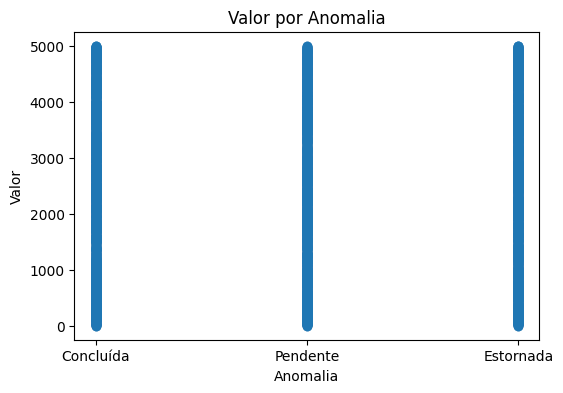

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Status"], df["Valor"], alpha=0.3)
plt.xlabel("Anomalia")
plt.ylabel("Valor")
plt.title("Valor por Anomalia")
plt.show()

## Feature Engineering

In [10]:
le = LabelEncoder()
df["Status_2"] = le.fit_transform(df["Status"])
df["TipoChave_2"] = le.fit_transform(df["TipoChave"])
df["Recebedor_Banco_2"] = le.fit_transform(df["Recebedor_Banco"])
df["Pagador_Banco_2"] = le.fit_transform(df["Pagador_Banco"])


df.head()

,EndToEndId,DataHora,Valor,Moeda,Pagador_Nome,Pagador_CPF_CNPJ,Pagador_Banco,Recebedor_Nome,Recebedor_CPF_CNPJ,Recebedor_Banco,ChavePix_Utilizada,TipoChave,Descricao,Status,Anomalia,Status_2,TipoChave_2,Recebedor_Banco_2,Pagador_Banco_2
0,f094cb2c-2a73-463c-b60e-0c57262051e4,2025-06-26 21:07:56,4658.86,BRL,Nathan Cardoso,13.253.967/0001-95,BTG Pactual,Ana Beatriz Ramos,901.361.580-95,Nubank,+559694830-9884,Telefone,Pagamento referente ao serviço 927,Concluída,0,0,4,11,0
1,f0409769-741f-49bd-811a-3842cc8f54db,2025-06-23 17:47:56,3184.72,BRL,Benjamin Barros,781.515.544-64,Banco do Brasil,Carlos Eduardo Nunes,288.758.607-72,Itaú Unibanco,+552298530-1917,Telefone,Pagamento referente ao serviço 950,Pendente,0,2,4,10,5
2,c1d22287-d343-4c91-b03d-dbe9a69695b3,2025-06-27 15:58:56,1054.48,BRL,Lorena Cunha,444.922.709-96,Banco Inter,Lívia Silveira,530.827.935-48,Bradesco,c4f4c3c6-4d78-4946-b33e-4a1135711a8a,Chave Aleatória,Pagamento referente ao serviço 173,Pendente,0,2,2,7,1
3,254423a9-50b7-41b1-a099-e8cf6232bab4,2025-07-15 13:59:56,3564.76,BRL,Sra. Luana Pinto,468.153.904-62,Banco Safra,Helena Pires,827.707.674-51,Caixa Econômica Federal,user421@email.com,E-mail,Pagamento referente ao serviço 560,Estornada,0,1,3,9,4
4,f1c5e3e7-bc62-4f18-91e3-c8f92aebdd59,2025-06-23 06:19:56,15.16,BRL,João Miguel da Cunha,83.407.726/0001-68,Santander Brasil,Dr. Luiz Felipe Dias,65.245.322/0001-12,C6 Bank,user97@email.com,E-mail,Pagamento referente ao serviço 140,Pendente,0,2,3,8,11


## Validar dados desbalanceados

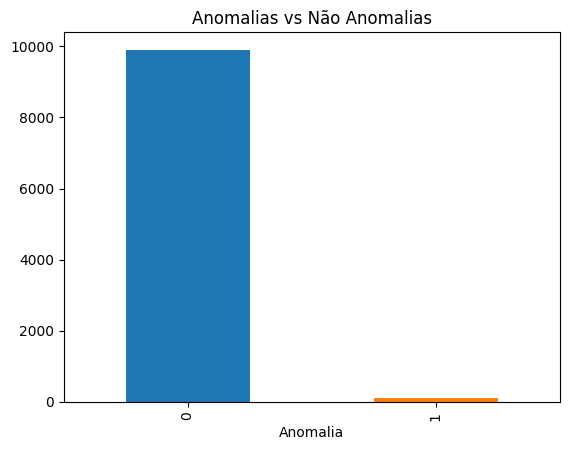

In [12]:
# plot = df.plot.scatter(x="Valor", y="Status_2", alpha=0.3)
df.Anomalia.value_counts().plot(kind='bar', title='Anomalias vs Não Anomalias',color = ['#1F77B4', '#FF7F0E']);

In [14]:
X =  df[["Valor", "Status_2", "TipoChave_2", "Recebedor_Banco_2", "Pagador_Banco_2"]]
y = df[["Anomalia"]]

In [15]:
# Cria o balanceador SMOTE
balanceador = SMOTE(random_state = 48)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(X, y)

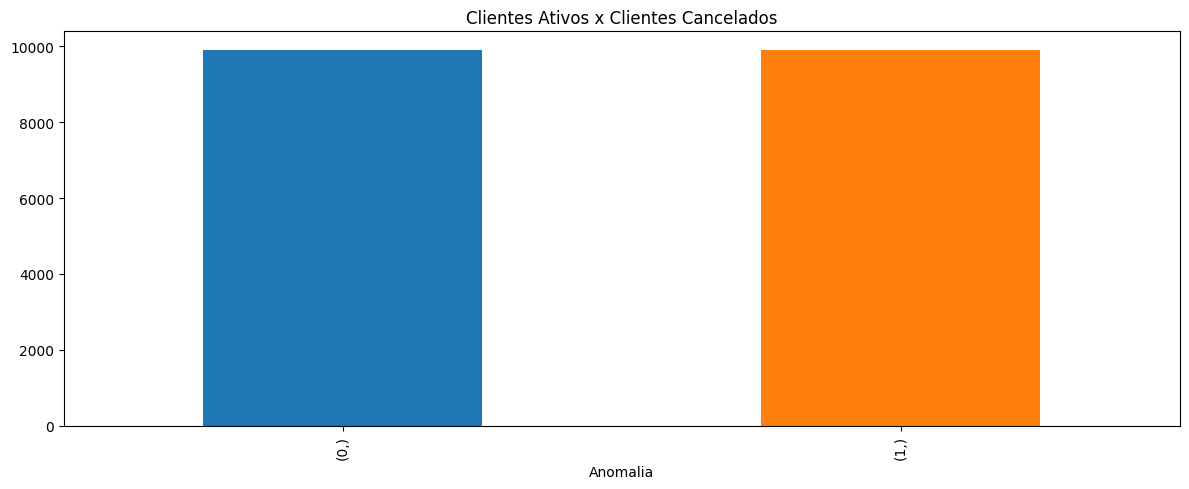

In [16]:
# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
TARGET_RES.value_counts().plot(kind='bar', title='Anomalias vs Não Anomalias Balanceados',color = ['#1F77B4', '#FF7F0E']);

## Treinar o modelo de regressão logística

In [17]:
model = LogisticRegression(class_weight='balanced')
X = df.select_dtypes(include=['int64', 'float64']).drop('Anomalia', axis=1)
y = df['Anomalia']

X_train, X_test, y_train, y_test = train_test_split(
    PREDITORAS_RES, TARGET_RES, test_size=0.2, random_state=42, stratify=TARGET_RES
)
model.fit(X_train, y_train)

c:\Users\vitor\OneDrive - Indev\Estudos\Ementa da prova ciencia de dados\Python\estudos proprios\algoritimos\ribas\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

Acurácia do modelo: 0.6545
Acurácia do modelo: 65.45%


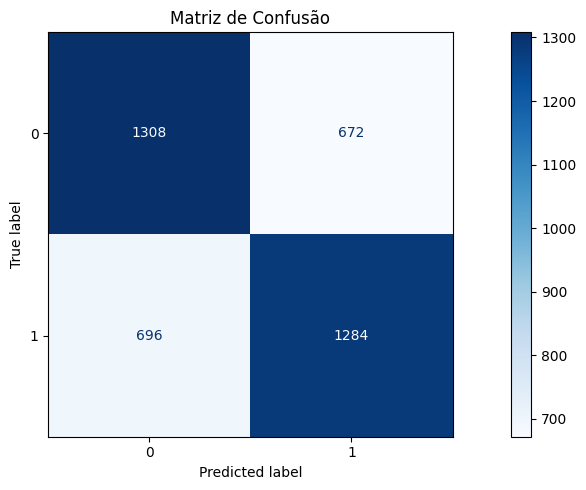

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()


## Conclusão e Avaliação do Modelo

### O que foi avaliado:

**Problema:** Detecção de anomalias em comprovantes PIX (classificação binária: 0 = normal, 1 = anomalia)

**Abordagem utilizada:**
- Feature Engineering com LabelEncoder para variáveis categóricas (Status, TipoChave, Bancos)
- Balanceamento de dados desbalanceados usando SMOTE
- Modelo: Regressão Logística com `class_weight='balanced'`
- Métricas: Acurácia e Matriz de Confusão

**Pontos positivos da implementação:**
- ✅ Tratamento adequado de variáveis categóricas
- ✅ Identificação e correção do desbalanceamento de classes
- ✅ Separação treino/teste com estratificação
- ✅ Visualizações para entender o problema

---

### Limitações da Regressão Logística para este problema:

**Por que este modelo não é ideal:**

1. **Assume relações lineares** - A regressão logística assume que as features têm uma relação linear com o log-odds da variável target. Anomalias/fraudes geralmente envolvem padrões complexos e não-lineares.

2. **Dificuldade em capturar interações complexas** - Fraudes em transações PIX provavelmente envolvem combinações não-óbvias de características (ex: valor alto + banco específico + horário suspeito + tipo de chave).

3. **Sensibilidade à escala e correlações** - Requer normalização e é afetado por multicolinearidade.

4. **Baixa interpretabilidade em contextos complexos** - Apesar de "interpretável" em termos de coeficientes, estes podem ser enganosos na presença de variáveis categóricas codificadas e interações não modeladas.

---

### Recomendações:

**Modelos mais adequados para detecção de anomalias em transações financeiras:**

**1. Random Forest** (Primeira escolha)
- Captura relações não-lineares automaticamente
- Identifica interações entre features sem precisar especificá-las
- Robusto a outliers e dados desbalanceados
- Fornece importância de features

**2. XGBoost / LightGBM / CatBoost** (Padrão da indústria)
- Altíssima performance em competições e produção
- Excelente para dados tabulares e detecção de fraudes
- CatBoost: Especialmente bom com variáveis categóricas (não precisa de encoding manual)

**3. Isolation Forest** (Se não houver labels de anomalias suficientes)
- Específico para detecção de anomalias
- Funciona bem mesmo com poucos exemplos de anomalias reais

**Próximos passos:**
1. Comparar performance da Regressão Logística com Random Forest e XGBoost
2. Utilizar métricas mais adequadas: **Precision, Recall, F1-Score, AUC-ROC**
   - Acurácia sozinha pode ser enganosa em detecção de fraudes
3. Considerar engenharia de features mais sofisticada (horário, frequência, padrões históricos)
4. Avaliar custo de falsos positivos vs falsos negativos
5. Implementar validação cruzada para estimativa mais robusta de performance

**Conclusão final:** 

A Regressão Logística serve como baseline, mas **modelos baseados em árvores (Random Forest, XGBoost) são significativamente superiores** para este tipo de problema. Recomenda-se experimentar esses modelos para obter melhor detecção de anomalias.